# Introduction to Optimization

```{admonition} Learning outcomes
After reading this note, you will be able to:
- Define an optimization problem
- Identify to which class of problems it belongs to
- Define local and global optimality conditions
- Describe the gradient descent procedure
```

## Notation

We will work on a wide variety of optimization problems. We will begin by establishing some common notation that we can use throughout the course. We will typically use small-case and upper-case boldface for vectors and matrices, respectively. A simple, constrained optimization problems could read as follows: 
```{math}
\begin{align}
\min_{\boldsymbol{x}\in\mathcal{X}}\; & f(\boldsymbol{x})\\
\text{subject to } & g_1(\boldsymbol{x}) \leq \boldsymbol{b}_1\\
& g_2(\boldsymbol{x}) = \boldsymbol{b}_2\\
\end{align}
````
Here, $\boldsymbol{x}$ is an $n$-dimensional vector of *decision variables*; these are the values that we can control to achieve an optimal outcome. Notice that under the $\min$ sign, we have declared that this vector must belong to some domain $\mathcal{X}$. The function $f(\cdot)$ maps a vector of values that we assign to decision variables to a real value; it is the *objective function* which we are attempting to minimize here. The functions $g_1(\cdot)$ and $g_2(\cdot)$ are generally *vector-valued*, i.e., they map the input (a vector of decision variable values) to another vector, here of the same dimension $n$. The $\leq$ and $=$ signs here should be interpreted as comparing two vectors: the output of $g_1(\cdot)$ or $g_2(\cdot)$ to vectors $\boldsymbol{b}_1$ or $\boldsymbol{b}_2$, respectively. These last two vectors will be typically referred to as *right-hand side* parameters or vectors.

This is a good time to distinguish decision variables from problem parameters (also sometimes referred to as "data"). As a user of optimization, you are interested in solving some applied or theoretical problem. To *model* the problem, you set certain parameters: your objective function $f(\cdot)$, your constraint functions $g_1(\cdot)$ and $g_2(\cdot)$, and your right-hand side vectors $\boldsymbol{b}_1$ and $\boldsymbol{b}_2$. As for the decision variables, these are to be determined through optimization, which comes down to a certain algorithmic procedure for searching the domain $\mathcal{X}$ of the variables $\boldsymbol{x}$ for values that satisfy the two sets of inequality and equality constraints while also minimizing the objective function.

```{note}
You can *maximize* rather than minimize the objective function $f(\cdot)$ by minimizing the function $-f(\cdot)$. As such, we will alternate between the two in these notes without loss of generality. Similarly, $\geq$ constraints can be expressed using $\leq$ constraints by multiplying both sides of the inequality with $-1$.
```

## Some one and two-dimensional functions

We will frequently make use of two-dimensional (or sometimes three-dimensional) plots to make sense of an optimization problem. Let us look at a continuous function $f:\mathbb{R}\mapsto\mathbb{R}$. This notation simply says that the function $f(\cdot)$ maps from one real number to another. We will use it extensively.

First off is this wiggly function in blue. Let's minimize it assuming only bound constraints on $x$, i.e., with domain $\mathcal{X}=[-4,4]$. There is a unique *global minimum* at around $x=-2.25$. However, there are multiple other *critical points*, points where the function $f$ in blue has derivatives (in orange) equal to zero. Some of these points are also *local minima*; others are *local maxima*.

Since this optimization problem has only simple bound counstraints and involves a continuous function, one can compute all of its local minima and maxima by finding the roots of the function's derivative. This is exactly what we've done in the code; see the next Note for more details on how to elegantly do this.

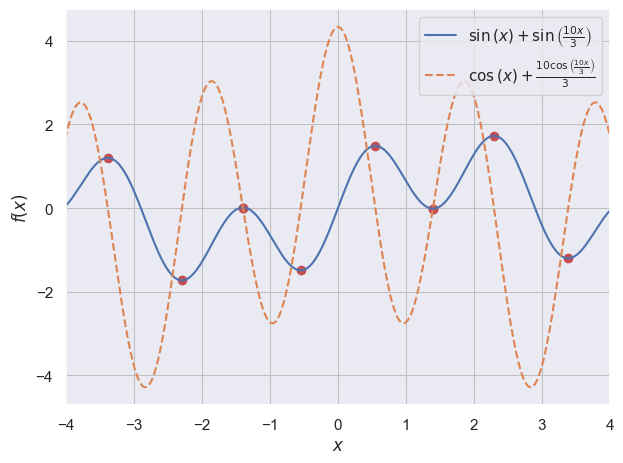

In [1]:
from sympy import * #Symbol, symbols, sin, cos, Polygon, solve, lambdify, Rational, pi, N
from sympy.plotting import plot
from spb import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

fig, ax = plt.subplots()

x = Symbol('x')
funky_function = sin(x) + sin(Rational(10.0, 3.0) * x)
funky_function_lambda = lambdify(x, funky_function)

funky_function_derivative_lambda = lambdify(x, funky_function.diff(x))
sols = fsolve(funky_function_derivative_lambda, np.linspace(-4,4,15))

plt.scatter(sols, [funky_function_lambda(sol) for sol in sols], marker='o', color='r')

p1 = plot(funky_function, show=False, legend=True, xlim=(-4,4), fig=fig, ax=ax)
p2 = plot(funky_function.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,4), fig=fig, ax=ax)
p1.append(p2[0])
p1.show()

```{admonition} Programming note
Look through the cell above to see how the figure was generated. I used Python's SymPy package, a great tool for symbolic computation. Think of it as being similar to MATLAB, in that it understand mathematical functions symbolically rather than numerically. This means that it can automatically derive the derivative of a function just as we would on paper! In additional, I used SciPy's `fsolve()` to find the zeros or roots of the derivative $f'(\cdot)$. This function took 15 initial guesses of where the roots of the orange derivative function are, then it searched around them. We will not go into this process in detail, but it is also a kind of optimization.
```

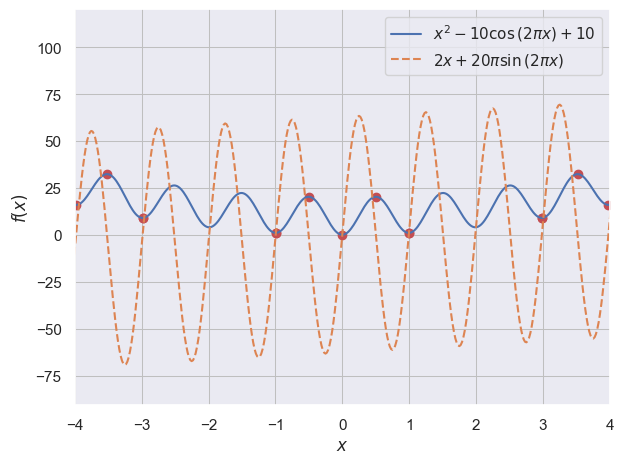

In [2]:
fig, ax = plt.subplots()

x = Symbol('x')
funky_function = 10 + x**2 - 10*cos(2*pi*x)
funky_function_lambda = lambdify(x, funky_function)

funky_function_derivative_lambda = lambdify(x, funky_function.diff(x))
sols = fsolve(funky_function_derivative_lambda, np.linspace(-4,4,15))

plt.scatter(sols, [funky_function_lambda(sol) for sol in sols], marker='o', color='r')

p1 = plot(funky_function, show=False, legend=True, xlim=(-4,4), fig=fig, ax=ax)
p2 = plot(funky_function.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,4), fig=fig, ax=ax)
p1.append(p2[0])
p1.show()

Let's move on to some two-dimensional functions. This one is a famous "test function" referred to as [*Branin*](https://www.sfu.ca/~ssurjano/branin.html). The color correspond to the z-axis values, more blue for smaller values, more yellow for larger values.

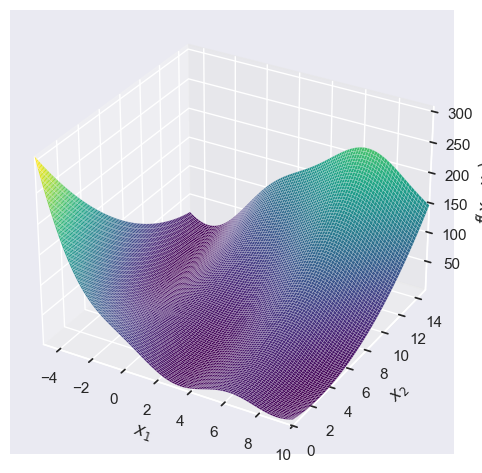

36*(-0.2125*x1**2/pi**2 + 5*x1/(6*pi) + x2/6 - 1)**2 + (10 - 5/(4*pi))*cos(x1) + 10

In [24]:
from sympy.plotting import plot3d

# This is the famous Branin function: https://www.sfu.ca/~ssurjano/branin.html
a=1
b=5.1/(4*pi**2)
c=5/pi
r=6
s=10
t=1/(8*pi)
x1, x2 = symbols('x1 x2')
funky_function = a*(x2-b*x1**2+c*x1-r)**2+s*(1-t)*cos(x1)+s
funky_function_lambda = lambdify([x1, x2], funky_function)

# sol = [float(-pi),12.275] # The two other minima are [9.42478, 2.475] and [-pi,12.275]
# plt.scatter([sol[0]], [sol[1]], [funky_function_lambda(sol[0], sol[1])], marker='o', color='r')

plot3d(funky_function, (x1, -5, 10), (x2, 0, 15))
funky_function

Another interesting test function with a unique global minimum at $(-2.903534, -2.903534)$.

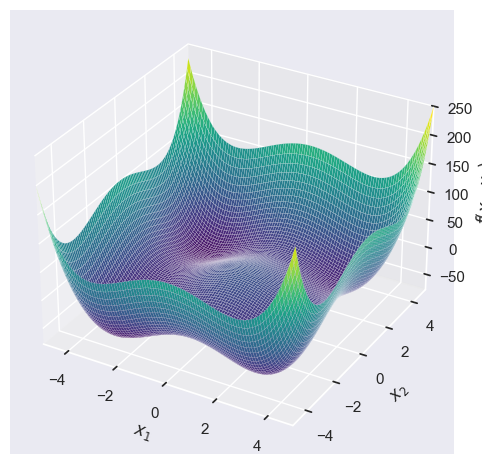

0.5*x1**4 - 8.0*x1**2 + 2.5*x1 + 0.5*x2**4 - 8.0*x2**2 + 2.5*x2

In [25]:
from sympy.plotting import plot3d

# This is this function: https://www.sfu.ca/~ssurjano/stybtang.html
x1, x2 = symbols('x1 x2')
funky_function = 0.5*(x1**4 - 16*(x1**2) + 5*x1 + x2**4 - 16*(x2**2) + 5*x2)
funky_function_lambda = lambdify([x1, x2], funky_function)

# The global minimum; unable to plot it for some reason
# sol = [-2.903534, -2.903534] 
# plt.scatter([sol[0]], [sol[1]], [funky_function_lambda(sol[0], sol[1])], marker='o', color='r')

plot3d(funky_function, (x1, -5, 5), (x2, -5, 5))
funky_function

Lastly, a very simple function in which a critical point with gradient (i.e., derivative in two dimensions or more) zero that is **not** a local minimum or maximum! Can you identify where the point is?

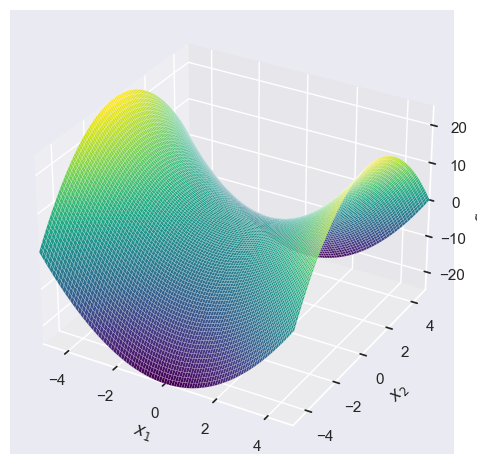

x1**2 - x2**2

In [58]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1, x2 = symbols('x1 x2')
funky_function = x1**2 - x2**2
funky_function_lambda = lambdify([x1, x2], funky_function)

plt.scatter(0,0,0, c='r', marker='o')
p1 = plot3d(funky_function, (x1, -5, 5), (x2, -5, 5), fig=fig, ax=ax)
p1.show()
funky_function

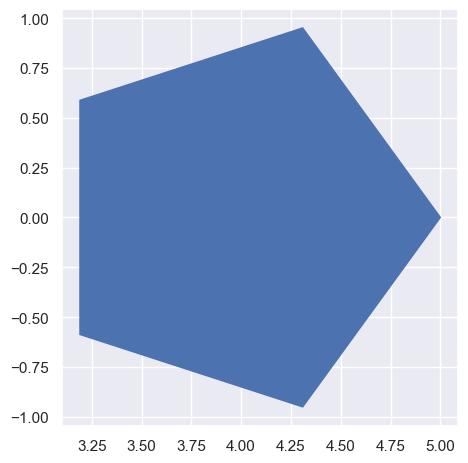

In [5]:
graphics(
    geometry(Polygon((4, 0), 1, n=5)),
    aspect="equal", grid=False
)